**California Housing Price Prediction**

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

**Analysis Tasks to be performed:**

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

**1. Load the data :**

Read the “housing.csv” file from the folder into the program.

In [1]:
import pandas as pd
import numpy as np

In [98]:
df1 = pd.read_excel('/content/1553768847_housing.xlsx')

Print first few rows of this data.

In [99]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Extract input (X) and output (Y) data from the dataset.

In [100]:
X = df1.drop(['median_house_value'], axis=1)
Y = df1['median_house_value']

**2. Handle missing values :**

Fill the missing values with the mean of the respective column.

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


**3. Encode categorical data :**

Convert categorical column in the dataset to numerical data.

In [101]:
#df1['ocn_prxy'] = df1.ocean_proximity.apply(lambda x: 0 if x == 'ISLAND' else 1 if x == 'NEAR BAY'  else 2 if x == 'NEAR OCEAN' else 3 if x == 'INLAND' else 4)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['ocean_proximity']=le.fit_transform(df1['ocean_proximity'])

In [102]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [103]:
df1.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [104]:
df1.total_bedrooms=df1.total_bedrooms.fillna(df1.total_bedrooms.mean())

In [105]:
df1.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [106]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


**Treatment for Outliers**

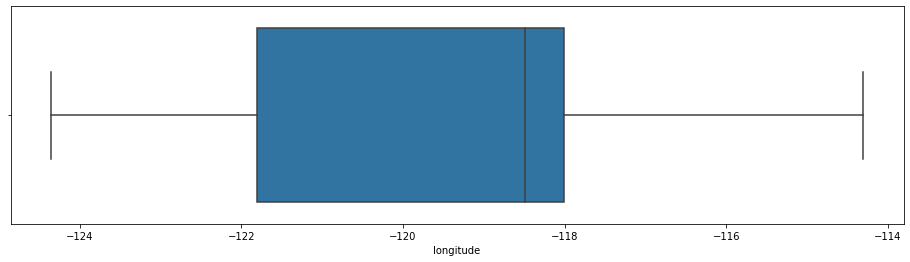

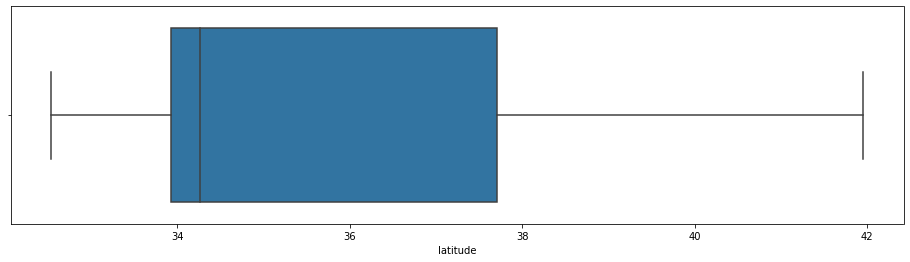

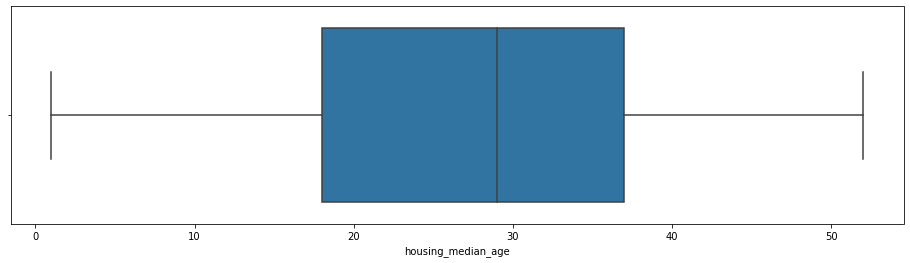

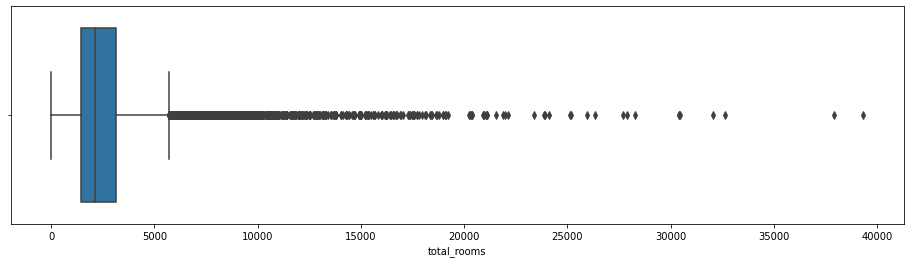

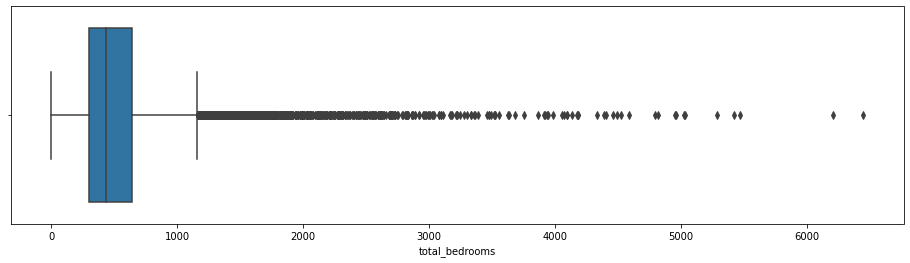

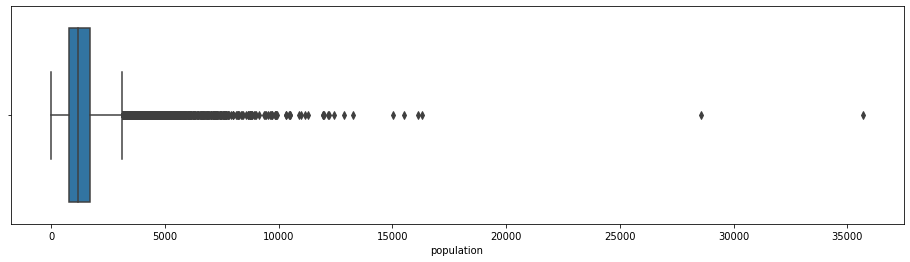

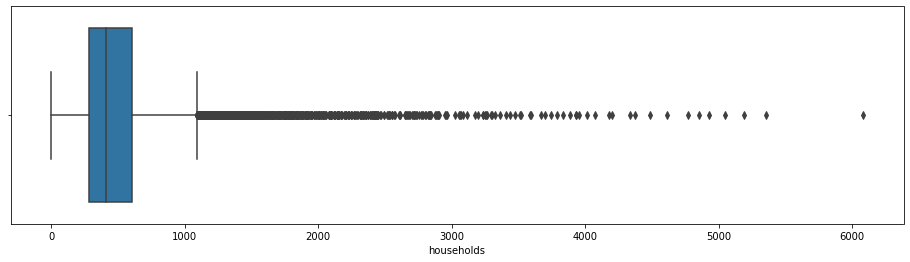

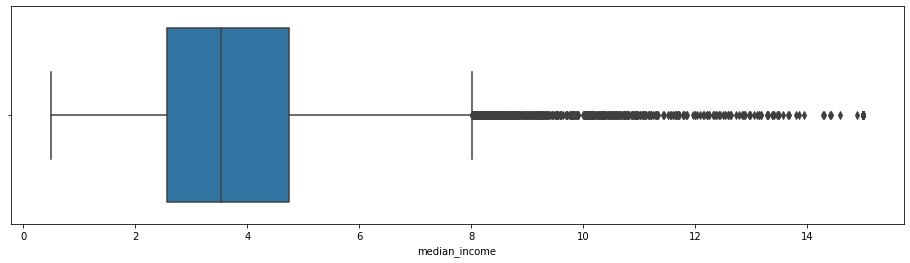

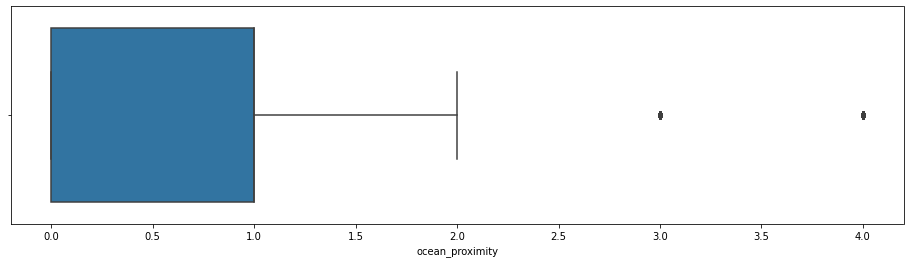

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2219.000630,456.362994,1223.037694,428.619428,3.653254,0.557607,206855.816909
std,2.003532,2.135952,12.585558,1117.601898,226.408014,622.946911,214.701419,1.463883,0.497170,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534750,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,2821.000000,575.000000,1559.000000,544.000000,4.546100,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,5694.000000,1161.000000,3132.000000,1092.000000,8.011300,2.000000,500001.000000


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

def del_outlier(column_name):
  if column_name != 'median_house_value':
    fig=plt.figure(figsize=(16,4))
    sns.boxplot(x = df1[column_name])
    plt.show()
    q1 = df1[column_name].quantile(0.25)
    q2 = df1[column_name].quantile(0.50)
    q3 = df1[column_name].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    df1[column_name] = np.where(df1[column_name]  > max_val, q2, df1[column_name] )
    df1[column_name] = np.where(df1[column_name]  < min_val, q2, df1[column_name] )   

for column in df1.columns: 
  del_outlier(column)

df1.describe()

In [107]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.289779,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,0.200974,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.112468,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.015693,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,-0.014688,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.070282,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,-0.018186,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,-0.014957,0.688075
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,1.000000,0.081750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,0.081750,1.000000


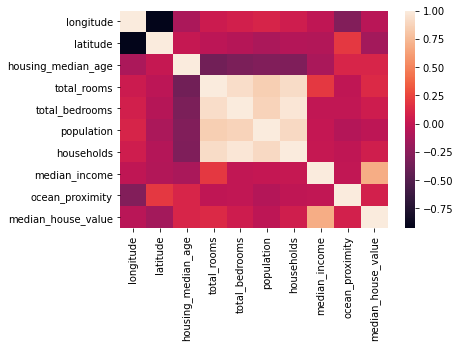

In [108]:
sns.heatmap(df1.corr())

In [109]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


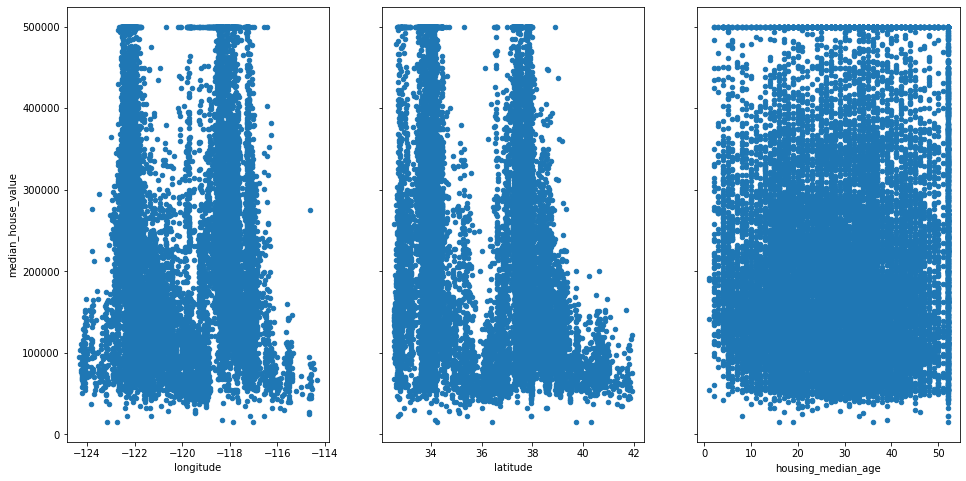

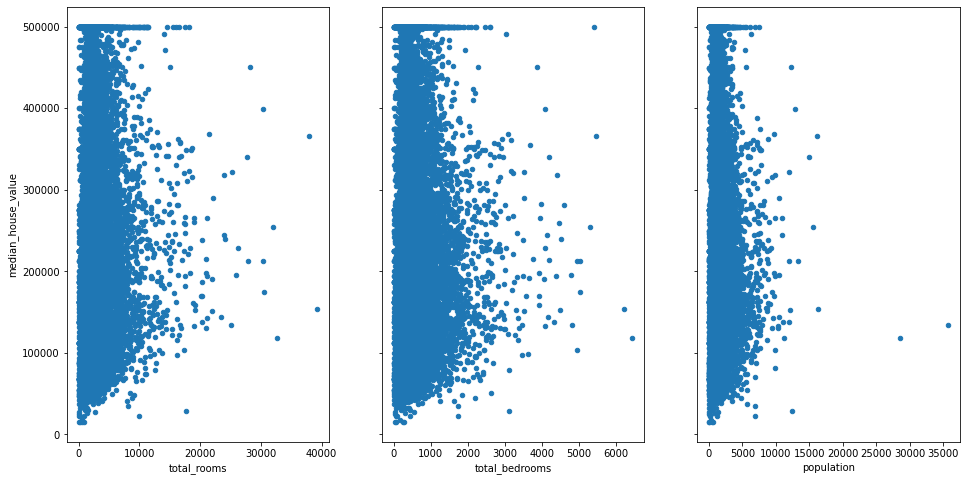

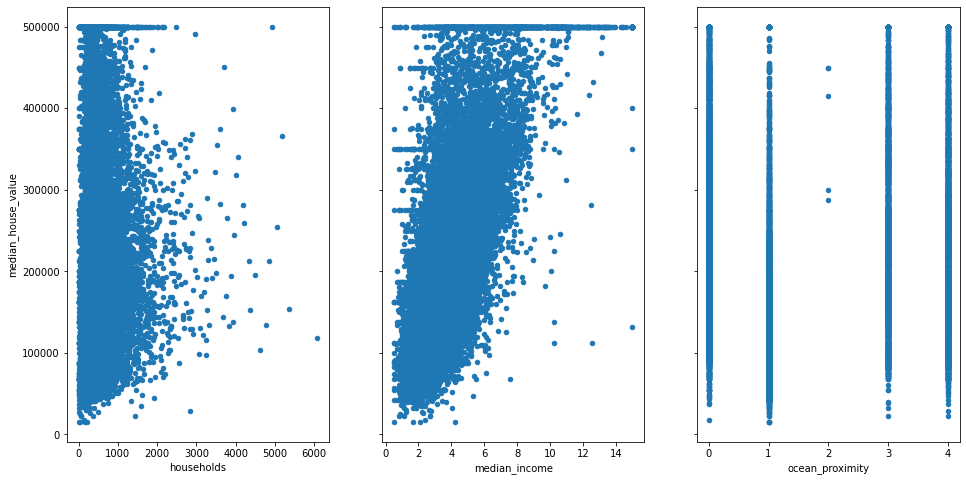

In [110]:
# data visualisation - graphs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
df1.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
df1.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
df1.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
df1.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
df1.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
df1.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
df1.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
df1.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
df1.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

**Insight**:From the above graphs we could see median house value has liner relationship with median income.

In [117]:
X = df1.drop(['median_house_value'], axis=1)
Y = df1['median_house_value']

**4. Split the dataset :**

Split the data into 80% training dataset and 20% test dataset.

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 20026)
# test_size = 0.2 for 20% test dataset

In [113]:
Y_train.head(2)

20090    137000
16069    308500
Name: median_house_value, dtype: int64

In [114]:
X_train.shape

(16512, 9)

In [115]:
X_test.shape

(4128, 9)

In [116]:
X_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20090,-120.22,38.05,14,3803,689.0,1129,477,2.7188,1
16069,-122.49,37.75,47,2140,425.0,1105,401,3.7054,4


**5. Standardize data :**

Standardize training and test datasets.

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train) #Using Standard scalar for scaling the attributes

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

**6. Perform Linear Regression :** 

Perform Linear Regression on training data.

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Predict output for test dataset using the fitted model.

In [121]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(model.intercept_)

206811.2693798446


In [122]:
model.coef_

array([-8.37700390e+04, -8.93347320e+04,  1.47629372e+04, -1.59279958e+04,
        3.82259277e+04, -4.34645882e+04,  2.56412304e+04,  7.62516032e+04,
        4.63114081e+01])

In [123]:
coeff_df = pd.DataFrame(model.coef_,index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
longitude,-83770.038986
latitude,-89334.731975
housing_median_age,14762.937206
total_rooms,-15927.995813
total_bedrooms,38225.927726
population,-43464.588236
households,25641.230352
median_income,76251.603164
ocean_proximity,46.311408


In [124]:
Y_pred = model.predict(X_test)

In [125]:
Y_pred

array([181908.15971968, 283276.97898804, 346560.91110368, ...,
       250596.96948011,  18208.0346104 , 257495.1667839 ])

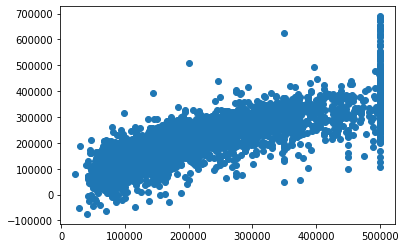

In [126]:
# data visualisation - graphs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.scatter(Y_test,Y_pred)

Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

In [127]:
import sklearn
import numpy as np
print('mean_absolute_error (MAE) ', sklearn.metrics.mean_absolute_error(Y_test,Y_pred))
print('mean_squared_error (MSE) ' ,sklearn.metrics.mean_squared_error(Y_test,Y_pred))
print('Root mean_squared_error (RMSE)', np.sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred)))
print('rsquared ',sklearn.metrics.r2_score(Y_test,Y_pred))

mean_absolute_error (MAE)  50891.74527632077
mean_squared_error (MSE)  4886305556.752569
Root mean_squared_error (RMSE) 69902.11410789068
rsquared  0.6328796397562544


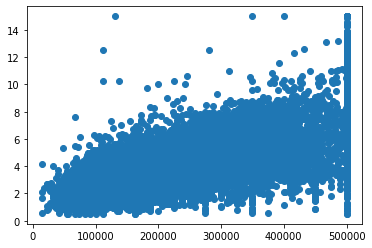

In [128]:
plt.scatter(df1.median_house_value, df1.median_income)

**Bonus exercise: Perform Linear Regression with one independent variable :**

Extract just the median_income column from the independent variables (from X_train and X_test).

In [129]:
df1.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500


In [147]:
X = df1['median_income']
Y = df1['median_house_value']
# Y = pd.DataFrame(np.array(Y).reshape(-1,1))

In [131]:
X=np.array(X).reshape(-1,1)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 20026)
# test_size = 0.2 for 20% test dataset

Perform Linear Regression to predict housing values based on median_income.

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [134]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict output for test dataset using the fitted model.

In [135]:
Y_pred = model.predict(X_test)

In [136]:
Y_pred

array([211067.0073297 , 284955.79938776, 352054.60652462, ...,
       216229.74447486, 130786.65441929, 227666.61222048])

In [150]:
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
print(model.intercept_, model.coef_)
print(sqrt(mean_squared_error(Y_test,Y_pred)))
print((r2_score(Y_test,Y_pred)))

44181.84365761941 [41939.37567151]
84639.5015203393
0.46176238745743425


In [42]:
Y_pred.dtype

dtype('float64')

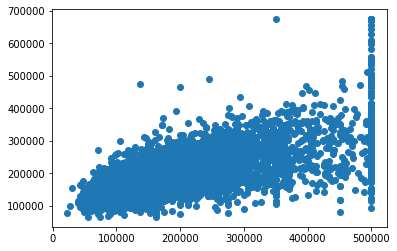

In [137]:
plt.scatter(Y_test,Y_pred)

In [138]:
X_test[0:5]

array([[3.9792],
       [5.741 ],
       [7.3409],
       [1.6955],
       [4.6445]])

In [139]:
Y_pred[0:5]

array([211067.0073297 , 284955.79938776, 352054.60652462, 115290.05510867,
       238969.27396395])

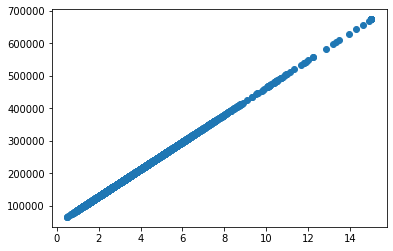

In [140]:
plt.scatter(X_test,Y_pred)

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [141]:
df1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

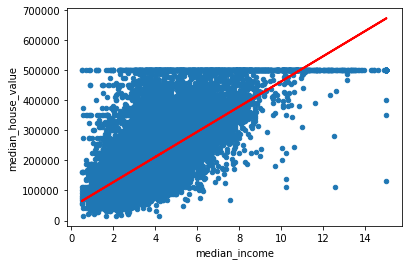

In [145]:
df1.plot(kind='scatter', x='median_income', y='median_house_value')
plt.plot(X_test,Y_pred,c='red',linewidth=2)